In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
train = pd.read_csv("../data/train.csv", encoding="utf-8-sig")
test = pd.read_csv("../data/test.csv", encoding="utf-8-sig")
sample = pd.read_csv("../data/sample_submission.csv", encoding="utf-8-sig")

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder

train.drop('abandoned_learning_sessions', axis=1, inplace=True)
test.drop('abandoned_learning_sessions', axis=1, inplace=True)
train.drop('average_login_time', axis=1, inplace=True)
test.drop('average_login_time', axis=1, inplace=True)
train.drop('payment_pattern', axis=1, inplace=True)
test.drop('payment_pattern', axis=1, inplace=True)

# 수치형 및 범주형 변수 구분
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64'] and col not in ['target']]
#numerical_cols.remove('payment_pattern')
categorical_cols = [col for col in train.columns if train[col].dtype == 'object' and col not in ['user_id']]
#categorical_cols.append('payment_pattern')
# 데이터 스케일링을 위한 StandardScaler 인스턴스 생성
scaler = StandardScaler()

# 수치형 데이터에 대해 스케일링 적용
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])

# 레이블 인코딩을 위한 LabelEncoder 인스턴스 생성 및 적용
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    train[col] = label_encoders[col].fit_transform(train[col])
    test[col] = label_encoders[col].transform(test[col])



# 전처리 후 학습 데이터 확인
train.head()

,user_id,subscription_duration,recent_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,target
0,b919c29d,0.167046,-0.121165,-0.829869,0.786885,1.038128,-0.669045,0.090246,1,0,1.400157,0
1,a0a60abb,0.621553,0.357181,0.316456,0.498363,0.212579,2.261009,-0.702077,2,0,-0.711163,1
2,b9f171ae,1.530566,-1.675788,-0.591616,0.065581,0.487762,1.939124,0.090246,2,1,-1.414937,1
3,5dc0ba8b,-1.650980,0.476767,-0.218820,0.931145,1.588495,-0.489192,-0.702077,1,0,-0.711163,1
4,65c83654,-1.196473,-1.197443,-0.431503,0.931145,-0.612970,0.691049,0.090246,2,0,0.696384,1


In [119]:
# from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline
# import pandas as pd

# # 데이터 불러오기
# train = pd.read_csv("./data/train.csv", encoding="utf-8-sig")
# test = pd.read_csv("./data/test.csv", encoding="utf-8-sig")

# y = train['target']

# train.drop(columns=['user_id', 'target'], axis=1, inplace=True)
# test.drop(columns=['user_id'], axis=1, inplace=True)

# # 수치형 및 범주형 변수 구분
# numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]
# categorical_cols = [col for col in train.columns if train[col].dtype == 'object']

# # 중요한 변수 설정
# important_variable = 'average_time_per_learning_session'

# # 수치형 데이터 및 중요한 변수 분할
# train_numeric_data = train[numerical_cols]
# test_numeric_data = test[numerical_cols]


# # 수치형 파이프라인 구성 (스케일링 및 PCA)
# numeric_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('pca', PCA(n_components=2)),
# ])

# # 변환을 적용하는 ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('numeric', numeric_pipeline, numerical_cols)
#     ]
# )

# #레이블 인코딩을 위한 LabelEncoder 인스턴스 생성 및 적용
# label_encoders = {}
# for col in categorical_cols:
#     label_encoders[col] = LabelEncoder()
#     train[col] = label_encoders[col].fit_transform(train[col])
#     test[col] = label_encoders[col].transform(test[col])

# # 전체 데이터 처리
# train_numeric_processed_data = preprocessor.fit_transform(train)
# test_numeric_processed_data = preprocessor.transform(test)

# #스케일링된 중요한 변수들을 다시 DataFrame에 추가
# scaler = StandardScaler()
# train[important_variable] = scaler.fit_transform(train[important_variable].values.reshape(-1, 1))
# test[important_variable] = scaler.transform(test[important_variable].values.reshape(-1, 1))

# categorical_cols.append(important_variable)

# train_processed_data = pd.concat([
#     pd.DataFrame(train_numeric_processed_data, columns=['pca1', 'pca2']),  # PCA 컬럼 이름 설정 필요
#     train[categorical_cols]
# ], axis=1)

# test_processed_data = pd.concat([
#     pd.DataFrame(test_numeric_processed_data, columns=['pca1', 'pca2']),  # PCA 컬럼 이름 설정 필요
#     test[categorical_cols]
# ], axis=1)

# train_processed_data.head()



,pca1,pca2,preferred_difficulty_level,subscription_type,average_time_per_learning_session
0,0.393808,0.317678,1,0,-0.829869
1,-0.350208,-1.289949,2,0,0.316456
2,0.120581,-1.881936,2,1,-0.591616
3,0.513919,-0.486540,1,0,-0.218820
4,-0.485311,-1.010458,2,0,-0.431503


In [74]:
# from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder

# # 수치형 및 범주형 변수 구분
# numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64'] and col not in ['target']]
# categorical_cols = [col for col in train.columns if train[col].dtype == 'object' and col not in ['user_id']]
# # 데이터 스케일링을 위한 StandardScaler 인스턴스 생성
# scaler = StandardScaler()

# # 수치형 데이터에 대해 스케일링 적용
# train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
# test[numerical_cols] = scaler.transform(test[numerical_cols])

# # 레이블 인코딩을 위한 LabelEncoder 인스턴스 생성 및 적용
# label_encoders = {}
# for col in categorical_cols:
#     label_encoders[col] = LabelEncoder()
#     train[col] = label_encoders[col].fit_transform(train[col])
#     test[col] = label_encoders[col].transform(test[col])

# onehot_encoders = {}
# new_train_columns = []
# new_test_columns = []

# for col in categorical_cols:
#     onehot_encoders[col] = OneHotEncoder()
#     train_temp = onehot_encoders[col].fit_transform(train[col].values.reshape(-1, 1))
#     test_temp = onehot_encoders[col].transform(test[col].values.reshape(-1, 1))

#     # 원핫인코딩 결과를 데이터프레임에 추가
#     train_temp_df = pd.DataFrame(train_temp.toarray(), columns=[f'{col}_{i}' for i in range(train_temp.shape[1])])
#     test_temp_df = pd.DataFrame(test_temp.toarray(), columns=[f'{col}_{i}' for i in range(test_temp.shape[1])])

#     # 기존 데이터프레임에서 범주형 열 제거
#     train = train.drop(col, axis=1)
#     test = test.drop(col, axis=1)

#     # 새로운 열 추가
#     train = pd.concat([train, train_temp_df], axis=1)
#     test = pd.concat([test, test_temp_df], axis=1)

#     # 새로운 열 이름 저장
#     new_train_columns.extend(train_temp_df.columns)
#     new_test_columns.extend(test_temp_df.columns)

# # 전처리 후 학습 데이터 확인
# train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target,preferred_difficulty_level_0,preferred_difficulty_level_1,preferred_difficulty_level_2,subscription_type_0,subscription_type_1
0,b919c29d,0.167046,-0.121165,-0.015962,-0.829869,0.786885,1.038128,-0.669045,-0.024844,0.090246,1.400157,0.647774,0,0.0,1.0,0.0,1.0,0.0
1,a0a60abb,0.621553,0.357181,1.152389,0.316456,0.498363,0.212579,2.261009,-0.594656,-0.702077,-0.711163,1.080460,1,0.0,0.0,1.0,1.0,0.0
2,b9f171ae,1.530566,-1.675788,0.400155,-0.591616,0.065581,0.487762,1.939124,-0.024844,0.090246,-1.414937,1.513146,1,0.0,0.0,1.0,0.0,1.0
3,5dc0ba8b,-1.650980,0.476767,0.877690,-0.218820,0.931145,1.588495,-0.489192,-1.734280,-0.702077,-0.711163,-1.515656,1,0.0,1.0,0.0,1.0,0.0
4,65c83654,-1.196473,-1.197443,2.130972,-0.431503,0.931145,-0.612970,0.691049,-0.594656,0.090246,0.696384,-1.515656,1,0.0,0.0,1.0,1.0,0.0


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import  CatBoostClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np

# 특성과 타겟 변수 분리
X = train.drop(columns=['user_id', 'target'])  # user_id는 제외하고 특성 데이터로 사용
y = train['target']

# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
counts = list(y_train.value_counts())

from sklearn.utils.class_weight import compute_class_weight 

# 훈련 데이터를 기반으로 클래스 가중치 계산 
class_weight  = compute_class_weight( 'balanced' , classes=[ 0 , 1 ], y=y_train)
weights = {i: w for i, w in enumerate(class_weight)}
print(weights)

{0: 1.3144922773578704, 1: 0.8069396812588259}


In [6]:
# 로지스틱 회귀 모델 초기화 및 학습
xgb_model = XGBClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 500],
             'learning_rate': [0.001, 0.01, 0.1, 1.0],
              'subsample':[0.5, 0.7, 1.0],
              'max_depth':[4, 7, 10],
              'random_state' : [42]
             }
f1_scorer = make_scorer(f1_score, average='macro')
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring=f1_scorer)
xgb_grid.fit(X_train, y_train)
print(f'best accuracy : {xgb_grid.best_score_}')
print('best param : ', xgb_grid.best_params_)

best accuracy : 0.5223971451454168
best param :  {'learning_rate': 1.0, 'max_depth': 4, 'n_estimators': 500, 'random_state': 42, 'subsample': 0.5}


In [11]:
# 최적의 하이퍼파라미터로 모델 초기화
best_params = xgb_grid.best_params_
best_xgb_model = XGBClassifier(**best_params)

# 클래스 가중치를 적용하여 모델 학습
best_xgb_model.fit(X_train, y_train)

# 검증 데이터에서 성능 평가
val_predictions = best_xgb_model.predict(X_val)
val_f1 = f1_score(y_val, val_predictions, average='macro', zero_division=0)

print("검증 데이터(Validation) Macro F1 성능 : ",val_f1)
print(classification_report(y_val, val_predictions, zero_division=0))


검증 데이터(Validation) Macro F1 성능 :  0.4869381230415665
              precision    recall  f1-score   support

           0       0.36      0.37      0.36       758
           1       0.61      0.61      0.61      1242

    accuracy                           0.52      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.52      0.52      0.52      2000



In [15]:
test.drop(columns=['user_id'], inplace=True, axis=1) 
test_predictions = best_xgb_model.predict(test)

# 제출 양식 파일(sample_submission.csv)의 'target' 컬럼에 나의 Test 데이터에 대한 예측 결과로 채우기
sample['target'] = test_predictions

# 리더보드 제출을 위해 나의 예측 결과를 baseline_submit.csv로 저장
submit_path = './xgb/baseline_submit(XGB_tuned_model_drop(aba, ave, pay)_labelencoding(PD, ST)).csv'
sample.to_csv(submit_path, index=False)

sample.head()

,user_id,target
0,0001d6e9,0
1,0002c77d,0
2,0002df5b,0
3,000b6068,1
4,00184a0c,0


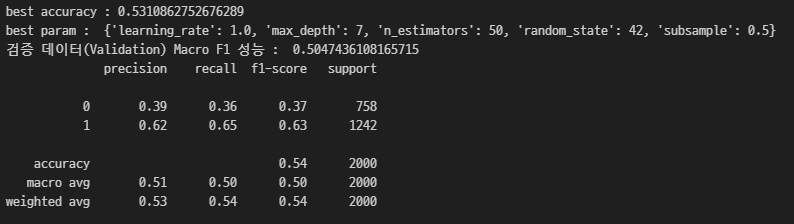
- preferred_difficulty_level 제외한 수치형 변수 pca 2개로
- subscription_type, preferred_difficulty_level 는 라벨 인코딩만
- average_time_per_learning_session 는 standardscaler만

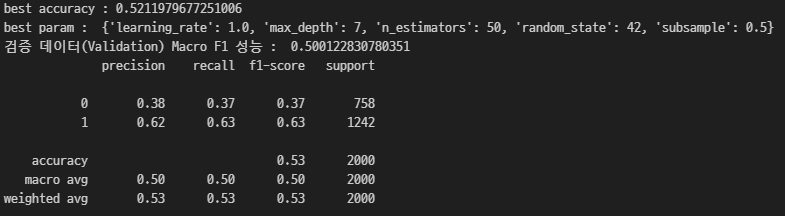
- 뭔지모름

In [131]:
test_predictions = xgb_grid.predict(test_processed_data)

# 제출 양식 파일(sample_submission.csv)의 'target' 컬럼에 나의 Test 데이터에 대한 예측 결과로 채우기
sample['target'] = test_predictions

# 리더보드 제출을 위해 나의 예측 결과를 baseline_submit.csv로 저장
submit_path = './xgb/baseline_submit(XGB_tuned_model_pca(exceptAT)_labelencoding(PD, ST)).csv'
sample.to_csv(submit_path, index=False)

sample.head()

,user_id,target
0,0001d6e9,0
1,0002c77d,1
2,0002df5b,0
3,000b6068,0
4,00184a0c,0


In [132]:
X_train.head()

,pca1,pca2,preferred_difficulty_level,subscription_type,average_time_per_learning_session
9254,0.972698,0.543499,1,0,-0.345056
1561,1.626576,-0.451749,1,0,2.338099
1670,0.278627,0.098310,1,1,-0.946320
6087,-0.042433,-0.394903,1,1,0.613642
6669,-0.281228,-1.557750,2,1,0.393265


In [ ]:
# 테스트 데이터에 대한 예측 수행
test_X = test.drop(columns=['user_id'])  # user_id는 제외하고 특성 데이터로 사용
test_predictions = xgb_grid.predict(test_X)

# 제출 양식 파일(sample_submission.csv)의 'target' 컬럼에 나의 Test 데이터에 대한 예측 결과로 채우기
sample['target'] = test_predictions

# 리더보드 제출을 위해 나의 예측 결과를 baseline_submit.csv로 저장
submit_path = './baseline_submit(XGB_tuned_model_pca(exceptAT)_labelencoding(PD, ST)).csv'
sample.to_csv(submit_path, index=False)

sample.head()

# 클러스터링 3

In [78]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

train = pd.read_csv("./data/train.csv", encoding="utf-8-sig")
test = pd.read_csv("./data/test.csv", encoding="utf-8-sig")
sample = pd.read_csv("./data/sample_submission.csv", encoding="utf-8-sig")

# 클러스터링할 열 선택 (여기서는 'average_time_per_learning_session'만 선택)
X = train[['average_time_per_learning_session']]
X_test = test[['average_time_per_learning_session']]

# 데이터 표준화 (스케일링)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# KMeans 클러스터링 모델 생성 및 학습
kmeans = KMeans(n_clusters=3)  # 클러스터 개수 설정
kmeans.fit(X_scaled)

# 클러스터링 결과를 데이터프레임에 추가
train['average_time_per_learning_session'] = kmeans.labels_
test['average_time_per_learning_session'] = kmeans.predict(X_test_scaled)

# 각 클러스터의 중심점 확인
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:", cluster_centers)

# 결과 출력
print(train)

from sklearn.preprocessing import StandardScaler, LabelEncoder

# 수치형 및 범주형 변수 구분
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64'] and col not in ['target']]
categorical_cols = [col for col in train.columns if train[col].dtype == 'object' and col not in ['user_id']]
categorical_cols.append('average_time_per_learning_session')

# 데이터 스케일링을 위한 StandardScaler 인스턴스 생성
scaler = StandardScaler()

# 수치형 데이터에 대해 스케일링 적용
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])

# 레이블 인코딩을 위한 LabelEncoder 인스턴스 생성 및 적용
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    train[col] = label_encoders[col].fit_transform(train[col])
    test[col] = label_encoders[col].transform(test[col])

onehot_encoders = {}
new_train_columns = []
new_test_columns = []

for col in categorical_cols:
    onehot_encoders[col] = OneHotEncoder()
    train_temp = onehot_encoders[col].fit_transform(train[col].values.reshape(-1, 1))
    test_temp = onehot_encoders[col].transform(test[col].values.reshape(-1, 1))

    # 원핫인코딩 결과를 데이터프레임에 추가
    train_temp_df = pd.DataFrame(train_temp.toarray(), columns=[f'{col}_{i}' for i in range(train_temp.shape[1])])
    test_temp_df = pd.DataFrame(test_temp.toarray(), columns=[f'{col}_{i}' for i in range(test_temp.shape[1])])

    # 기존 데이터프레임에서 범주형 열 제거
    train = train.drop(col, axis=1)
    test = test.drop(col, axis=1)

    # 새로운 열 추가
    train = pd.concat([train, train_temp_df], axis=1)
    test = pd.concat([test, test_temp_df], axis=1)

    # 새로운 열 이름 저장
    new_train_columns.extend(train_temp_df.columns)
    new_test_columns.extend(test_temp_df.columns)

# 전처리 후 학습 데이터 확인
train.head()

Cluster Centers: [[ 23.68316825]
 [206.98226867]
 [ 90.85057252]]
       user_id  subscription_duration  recent_login_time  average_login_time  \
0     b919c29d                     13                 14           14.946163   
1     a0a60abb                     16                 18           18.453224   
2     b9f171ae                     22                  1           16.195228   
3     5dc0ba8b                      1                 19           17.628656   
4     65c83654                      4                  5           21.390656   
...        ...                    ...                ...                 ...   
9995  ae6b76bc                     22                 29           14.727623   
9996  24588752                     10                 11           19.374054   
9997  e4622a54                      7                 27           18.240978   
9998  e07fbad9                     11                  7           18.783800   
9999  e12dcb55                     10                 

c:\Users\dbswo\anaconda3\envs\subs_predict\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,user_id,subscription_duration,recent_login_time,average_login_time,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target,preferred_difficulty_level_0,preferred_difficulty_level_1,preferred_difficulty_level_2,subscription_type_0,subscription_type_1,average_time_per_learning_session_0,average_time_per_learning_session_1,average_time_per_learning_session_2
0,b919c29d,0.167046,-0.121165,-0.015962,0.786885,1.038128,-0.669045,-0.024844,0.090246,1.400157,0.647774,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,a0a60abb,0.621553,0.357181,1.152389,0.498363,0.212579,2.261009,-0.594656,-0.702077,-0.711163,1.080460,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,b9f171ae,1.530566,-1.675788,0.400155,0.065581,0.487762,1.939124,-0.024844,0.090246,-1.414937,1.513146,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,5dc0ba8b,-1.650980,0.476767,0.877690,0.931145,1.588495,-0.489192,-1.734280,-0.702077,-0.711163,-1.515656,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,65c83654,-1.196473,-1.197443,2.130972,0.931145,-0.612970,0.691049,-0.594656,0.090246,0.696384,-1.515656,1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import  CatBoostClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 특성과 타겟 변수 분리
X = train.drop(columns=['user_id', 'target'])  # user_id는 제외하고 특성 데이터로 사용
y = train['target']

# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 초기화 및 학습
xgb_model = XGBClassifier()
param_grid = {'n_estimators': [50, 100, 500],
             'learning_rate': [0.001, 0.01, 0.1, 1.0],
              'subsample':[0.5, 0.7, 1.0],
              'max_depth':[4, 7, 10],
              'random_state' : [42]
             }
f1_scorer = make_scorer(f1_score, average='macro')
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring=f1_scorer)
xgb_grid.fit(X_train, y_train)

# 검증 데이터에서 성능 평가
val_predictions = xgb_grid.predict(X_val)
val_f1 = f1_score(y_val, val_predictions, average='macro', zero_division=0)
print(f'best accuracy : {xgb_grid.best_score_}')
print('best param : ', xgb_grid.best_params_)

print("검증 데이터(Validation) Macro F1 성능 : ",val_f1)
print(classification_report(y_val, val_predictions, zero_division=0))


best accuracy : 0.5233799273767807
best param :  {'learning_rate': 1.0, 'max_depth': 7, 'n_estimators': 50, 'random_state': 42, 'subsample': 0.7}
검증 데이터(Validation) Macro F1 성능 :  0.4966573719669547
              precision    recall  f1-score   support

           0       0.38      0.34      0.36       758
           1       0.62      0.65      0.64      1242

    accuracy                           0.54      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.53      0.54      0.53      2000



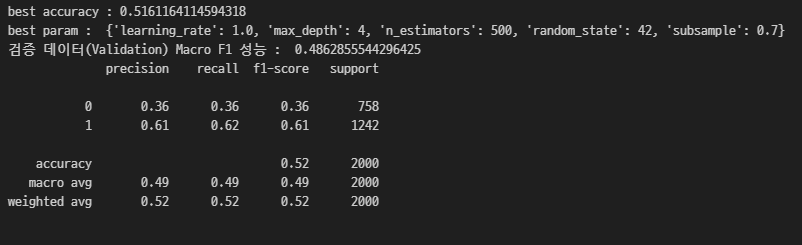

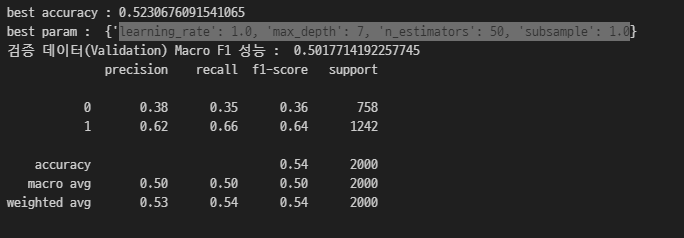](attachment:image.png)

## 23일
#### 제대로 클러스터링한거 넣어서 점수 다시 확인
#### xgb 튜닝하고 클러스터링한거 넣어서 점수 확인 - 여기까지 3번
#### 모델별로 돌리고 가장 높은거 2개 넣어보기
#### 성능 좋은 모델 2개 선정하고 이것에 대해서만 전처리 & 파라미터 튜닝 계속 해보기

## 24일
#### 이상치 제거 평균 학습 세션, 달성률에 대해 적용하고 확인해보기

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import  CatBoostClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 특성과 타겟 변수 분리
X = train.drop(columns=['user_id', 'target'])  # user_id는 제외하고 특성 데이터로 사용
y = train['target']

# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 초기화 및 학습
xgb_model = XGBClassifier(learning_rate = 1.0, max_depth = 7, n_estimators = 50, subsample = 1.0, random_state=42)

xgb_model.fit(X_train, y_train)

# 검증 데이터에서 성능 평가
val_predictions = xgb_model.predict(X_val)
val_f1 = f1_score(y_val, val_predictions, average='macro', zero_division=0)

print("검증 데이터(Validation) Macro F1 성능 : ",val_f1)
print(classification_report(y_val, val_predictions, zero_division=0))


검증 데이터(Validation) Macro F1 성능 :  0.494071527969833
              precision    recall  f1-score   support

           0       0.37      0.32      0.34       758
           1       0.62      0.67      0.64      1242

    accuracy                           0.54      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.53      0.54      0.53      2000

